# Neural Networks
## Language: Julia
### Author: Daisy Nsibu

# 1. Introduction

### 1.1. What are neural networks?

Neural networks are inspired by biological neurons in the brain. If you take a look at the picture below, on the left you see a picture of a biological neuron. You see dendrites, a nucleus, and an axion. 
![](https://miro.medium.com/max/2800/0*dS0ZKyOYRvOLezNG)

In the biological model, dendrites will feed through signals to the nucleus and those signals will stimulate the nucleus and activate a signal that passes through the axions. Depending on the strength of those signals the axion will fire.

When we design some computational unit to model this, we call it an artifical neuron. We have inputs that go into the dendrites with weights that tell the nucleus how to fire. So through combinations and linking together of artifical neurons we hope to mimic the process
of learning in the brain. 

### 1.2. How do Neural Networks work?

* Well each input signal or a feature measure in our case for supervised learning is scaled by the first layer weights which in turn affects the function computed at the unit. If we look at artifical neuron unit, this artificial neuron which is just a computational unit in other words it is a function of the input weights, so the input signal, so the weights are going to scale the input signal which affects the output of that neuron. 


* So, once you have a bunch of neurons that are connected the neural net then computes a function of the input signal by propagating the signal, or the computed values, from the input signal to the output neurons and it uses the weights as intermediate parameters. So you'll have a sequence of neurons that are layered together, one layer after another, and there's weights between each of those layers and the signal is weighted, squeezed adjusted throughout the forward pass of this system. In turn it computes a function. It's going to tell the network whether or not something is occurring or not, or whether or not to take an action or not. 


* So learning occurs by adjusting the weights in the neural network in order to change the output. 

Imagine there's weights connecting thousands of neurons together and if you adjust those weights, the input signal will vary and the output will differ based off of the weights that you choose. 



### 1.3. Example of a neural network

To model this so suppose we have a collection of *N* labeled data points (Supervised Learning).
    $$ (x^i, y^i),...,(x^N, y^N)$$ Each data point contains 3 feature measures, so each of the x's is a element of $\mathbb{R}^3$ and then each of the labels is an element of $\mathbb{R}^2$ , it's a two-dimensional vector.
 
 $x^i \in \mathbb{R}^3$ for $i=1,...,N$. Also, $y^i \in \mathbb{R}^2$
For $i=1,...,N$ each data point label we can say that the vector $
\begin{bmatrix}1 \\ 0 \end{bmatrix}$ indicates label *class A*  and the vector$
\begin{bmatrix}0 \\ 1 \end{bmatrix}$ indicates label *class B*.

This is what we're going to try to model with the neural network. 

### Part 0: Design Phase

**Build the neural network**

First we need to design the network. So when we're building a network we're going to have weights and biases associated with the interconnections between the layers and biases placed on the individual neurons so weights and biases will be initialized to be random and we will do this according to a normal distribution. 

In order to learn how to calculate the gradient and optimize on a neural network we're going to choose a small neural network one with three layers, $L=3$. We're going to have one input layer, one hidden layer, and one output layer.![](https://www.researchgate.net/profile/Farhan-Feroz/publication/256375944/figure/fig1/AS:297702152785923@1447989132712/A-3-layer-neural-network-with-3-inputs-4-hidden-nodes-and-2-outputs-Image-courtesy-of.png)

Here is our network. We have 3 features for each of our data points and then we have our biases. We have one input layer, where we feed our 
features in, we have one hidden layer and then we have one output layer.

$w^{l}_{ij}$= weights from neuron $j$ in layer l-1 to neuron *i* in layer *l*

$b^{l}_{i}$= bias connected to neuron *i* in layer *l*





### Part 1: feed forward phase

1. So we've constructed a a simple neural network. For a given training feature $x^i$ we input the features, or the signals from this vector, along with 1.0 into each neuron.

![](https://i.imgur.com/W2f6f9j.png)

Here we see that:
+ $x_{1}^{i}$ is fed into neuron 1 of layer 1.

+ $x_{2}^{i}$ is fed into neuron 2 of layer 1. 
+ $x_{3}^{i}$ is fed into neuron 3 of layer 1.
+ 1.0 is fed into the bias neuron of layer 1.

2. Each feature vector is then transformed by a linear product with the layer 2 weights.

What we are going to do is define  $a^{1}$ to be our input vector
So once we feed these numerical values in, each feature measure is then transformed by a linear transformation with the layer 2 weights. 

**Pre-Activation at Layer 2**

Every layer besides the input layer is going to have a **pre-activation value** and it's defined as: 
$$ z_{i}^{2} = ( \sum_{j=1}^{3} w_{i j}^{2}a_{j}^{1}) + b_{i}^{2}$$

It might be easier to actually think of this in terms of a matrix vector product because, if we have $z_{1}^{2}$ and $z_{2}^{2}$ this is like a column vector.So we can think of $z^{2}$ as : $z^{2} = W^{2}a^{1} + b^{2} =\begin{bmatrix}w_{1,1}^{2} \space w_{1,2}^{2} \space w_{1,3}^{2}\\ w_{2,1}^{2} \space w_{2,2}^{2} \space w_{2,3}^{2}\end{bmatrix}*\begin{bmatrix}a_1^{1} \\ a_2^{1}\\ a_3^{1} \end{bmatrix}+ \begin{bmatrix}b_1^{2} \\ b_2^{2} \end{bmatrix}$ 

3. Each pre-activation value is then "squished" by the sigmoid function to produce a post-activation value.

**Post-Activation at Layer 2**

This sigmoid function will produce the **post-activation values** at layer 2.
$$ a_{i}^{2} = \sigma(z_{i}^{2}) = \sigma ((\sum_{j=1}^{3} w_{i j}^{2}a_{j}^{1}) + b_{i}^{2}) $$
In terms of linear algebra we're just applying the sigmoid to each entry in this two-dimensional vector.

$$a^{2} = \sigma(z^{2}) = \sigma(W^{2}a^{1} + b^{2})$$

We store these values in the hidden layer and these numerical values will tell us how much of the signals are going to influence the rest of the network. And the strength of these signals is going to determine what the strength of the output of the next layer is.

4. Repeat the step previously and compute the pre-activation for the next layer.

**Pre-Activation at Layer 3**
$$ z_{i}^{3} = ( \sum_{j=1}^{2} w_{i j}^{3}a_{j}^{2}) + b_{i}^{3}$$
In terms of linear algebra we can think of it like,

$$z^{3} =W^{3}a^{2} + b^{3}$$

In general, no matter how many layers we have, the rule is always going to be:
$z^{\ell} =W^{\ell}a^{\ell-1} + b^{\ell}$ for $\ell = 2, ..., L $

In terms of a matrix :

$$z^{3} = W^{3}a^{2} + b^{3} =\begin{bmatrix}w_{1,1}^{3} \space w_{1,2}^{3} \\ w_{2,1}^{3} \space w_{2,2}^{3} \end{bmatrix}+\begin{bmatrix}a_1^{2} \\ a_2^{2} \end{bmatrix}+ \begin{bmatrix}b_1^{3} \\ b_2^{3} \end{bmatrix}$$ 

5. Compute the post-activation values for the next layer.

**Post-Activation at Layer 3**

$$a^{3} = \sigma(z^{3}) = \sigma(W^{3}a^{2} + b^{3})$$

6. Finally obtain your output, at your final layer, the **output layer**

At L = 3 the neural network outputs two numbers, $a_{1}^{3}$ and  $a_{2}^{3}$.

Sometimes denoted as,

$$\begin{bmatrix}a_1^{3} \\ a_2^{3} \end{bmatrix} = o $$ 



For a given input $x^{i}$ the neural network gives a prediction that  $x^{i}$, the input, is either  *class A*or  *class B*, based off of the maximum entry in our hypothesis (output vector) being assigned to 1 and all other values being assigned 0.

For example, if the output is $o= \begin{bmatrix}.79 \\.35\end{bmatrix} $, then we would predict *class A.*

If the output is $o= \begin{bmatrix}.11 \\.85\end{bmatrix} $, then we would predict *class B.*

Note: we are guarenteed that the outputs of our neural network are always going to have entries between 0 and 1, because we chose the sigmoid function as our activation function at each neuron.

Among all possible weights and biases there exists a best collection of values that should approximate the correct hypothesis. Thus, we train the weights and biases to be the bext fitting function according to some cost function (using some optimization technique, i.e. batch gradient descent)

The
output
is a function of the w's the weights and
the biases,
so if we're going to use something like
gradient descent to optimize these w's
and b's
we need to figure out how to calculate
the gradient
of this function 

### Part II : Backpropagation

In order to optimize the weights
and the biases of this
neural network we need a cost function
that penalizes the network whenever the
weights
and biases are bad.

**The Loss Function**
$$
C(W,b) = \frac{1}{ 2} \sum_{k=1}^{n}(a_{k}^{L} - y_{k}^{i})^{2} = \frac{1}{ 2}(a_{1}^{3} - y_{1}^{i})^{2} + \frac{1}{ 2}(a_{2}^{3} - y_{2}^{i})^{2}
$$

We need to learn how to calculate
the gradient of the cost function with
respect to the w's and
b's (the weights and the biases)
and then once we do that we just apply
gradient descent.

**Gradient Descent**
$$
W^{k+1} = W^{k} - \alpha \frac{\partial {C}}{ \partial {W^{k}}}$$
$$
b^{k+1} = b^{k} - \alpha \frac{\partial {C}}{ \partial {b^{k}}}
$$

**Output Error**

We define the output error 
at neuron j as:
$$
\delta_{j}^{L} = \frac{\partial {C}}{\partial {a_{j}^{L}}}\sigma'(z_{j}^{L})
$$
$$
\delta^{L} = \nabla _{a} C \otimes \sigma ' (z^{L})
$$
$\nabla _{a} C = $  vector of partial derivatives of C with respect to $a^{L}$ and 
$\otimes= $ [Kronecker product](https://en.wikipedia.org/wiki/Kronecker_product)

**Backpropagate** the error:

For each *l* = L-1, L-2, ..., 2 compute $\delta^{x^{i},l}$ = $((w^{l+1})^{T \delta^{x^{i},l+1}})$ $\otimes \sigma'(z^{x^{i},l})$

![](https://i.imgur.com/1S1yGIe.png)

# 2. Neural Networks and the MNIST Data Set

In this notebook, I'll be using the MNIST dataset, which is a set of 70,000 small images of digits handwritten by high school students and employees of the US Cen‐sus Bureau. 60,000 of which are typically used as labeled training examples, where the other 10,000 of the images are what we will use for testing.

Each image is labeled with the digit it represents. This set has been studied so much that it is often called the “Hello World” of Machine Learning, whenever people come up with a new classification algorithm, they are curious to see how it will perform on MNIST. Whenever someone learns Machine Learning, sooner or later they tackle MNIST.

The following picture represents the MNIST sample images.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/MnistExamples.png/320px-MnistExamples.png)

To access this data set, as well as view the data as an image, we will need the following packages:
* [MLDatasets documentation](https://juliaml.github.io/MLDatasets.jl/latest/)
* Images, TestImages, ImageMagicIO [documentation](http://learningjulia.com/2017/02/20/getting-started-with-images.html)

## Import Packages

In [1]:
using MLDatasets
using Images
using TestImages
using Plots
using PlotThemes
theme(:juno)

┌ Info: Precompiling MLDatasets [eb30cadb-4394-5ae3-aed4-317e484a6458]
└ @ Base loading.jl:1278
┌ Info: Precompiling Images [916415d5-f1e6-5110-898d-aaa5f9f070e0]
└ @ Base loading.jl:1278
┌ Info: Precompiling TestImages [5e47fb64-e119-507b-a336-dd2b206d9990]
└ @ Base loading.jl:1278


In [3]:
train_x, train_y = MNIST.traindata()
test_x, test_y = MNIST.testdata();


This data set here are what are called tensors so tensors are multi-dimensional arrays. So for example a matrix is a two-dimensional tensor but this is going to be a three-dimensional tensor. We can think of this as like each slice of this box is a matrix and each matrix is going to represent the features of a given image. Let's look at the size of train_x.

In [6]:
size(train_x)

(28, 28, 60000)

So this is the 28 x 28 x 60,000 tensor so what that's saying here is
that we have 28 entries along uh the rows here 28 entries along the columns and then there's 60,000 of these matrices. Each of these
corresponds to a matrix representation of a grayscaled image of a handwritten digit.

So the 28 x 28 that's each matrix so each of these images is a 28 by 28
matrix and these are all values in the range zero to one and that just
represents the pixel intensity of that given the pixel.

![](https://www.tensorflow.org/images/MNIST-Matrix.png)

In [9]:
train_x[:, :, 1]

28×28 Array{N0f8,2} with eltype Normed{UInt8,8}:
 0.0  0.0  0.0  0.0  0.0  0.0    0.0    …  0.0    0.0    0.0    0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.0    0.0    0.0    0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.0    0.0    0.0    0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.0    0.0    0.0    0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.0    0.216  0.533  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0    …  0.0    0.675  0.992  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.071  0.886  0.992  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.671  0.992  0.992  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.118     0.859  0.992  0.831  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.141     0.992  0.992  0.529  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.369  …  0.992  0.992  0.518  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.604     0.992  0.957  0.063  0.0  0.0  0.0
 0.0  0.0  0.0 

Looking at an example of train_x and then we'll say all the rows all the columns and then we'll look at the first matrix. So we see that we have a 28x28 array and this array or this this matrix represents the feature values for this image, the pixel density for that image.

The first image in the training data is labeled: 5


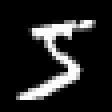

In [12]:
println("The first image in the training data is labeled: ", train_y[1])
colorview(Gray, train_x[:, :, 1]')

Each of these training features, or each of these instances of training features, is a matrix but recall that our neural network is going to take in a vector. So how do we do it?

In [13]:
reshape(train_x[:,:,1], 784)
# makes a column vector

784-element Array{N0f8,1} with eltype Normed{UInt8,8}:
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 ⋮
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8

So what I'm going to do is to go ahead and take every instance in train_x and convert it to a column vector.

In [33]:
X = []
Y = []

for i = 1:60000
    push!(X, reshape(train_x[:, :, i], 784))
    y = zeros(10)
    y[train_y[i] + 1] = 1.0
    push!(Y, y)
end
train_data = [x for x in zip(X, Y)]

X = []
Y = []

for i = 1:10000
    push!(X, reshape(test_x[:, :, i], 784))
    y = zeros(10)
    y[test_y[i] + 1] = 1.0
    push!(Y, y)
end
test_data = [x for x in zip(X, Y)];

Now let's go ahead and build our neural network

## Building the Neural Network


In this notebook I'll be building a multilayered perceptron with $L$ layers, 784 input neurons, $L- 2$ hidden layers of arbitrary size, and 10 neurons in the output layer. For the activation function, I will use the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function)

For $l$=2,..., $L$ each layer $l$ in the network will have 2 phases. The preactivation phase, $z^l = W^{l} a^{l-1} + b^l$ and the postactivation phase $a^{l} = \sigma(z^{l}) = \sigma(W^{l}a^{l-1} + b^{l})$.

![](https://i.imgur.com/nQCsFs8.png)

The preactivation phase consists of a weighted linear combination of postactivation values in the previous layer. The postactivation values consists of passing the preactivation value through an activation function elementwise. 

For a given training instance ($x^{i}, y^{i}$), we will use the mean square error cost:

$C = C(W,b) = \frac{1}{2} \sum_{k=1}^{n}(a_{k}^{L} - y_{k}^{i})^{2}$

In [34]:
# define the activation function and its derivative
σ(x) = 1.0/(1.0 + exp(-x))

dσ(x)= σ(x)*(1- σ(x))

# define a neural network type
mutable struct neural_network
    W # weights
    b # biases
end


#initialize the weights and biases

function create_network(input_layer_size, hidden_layer_sizes, output_layer_size)
    W = [[0.0], randn(hidden_layer_sizes[1], input_layer_size)] # weights start at layer 2
    b = [[0.0], randn(hidden_layer_sizes[1])] # weights start at layer 2
    for i = 2:length(hidden_layer_sizes)
        push!(W, randn(hidden_layer_sizes[i], hidden_layer_sizes[i-1]))
        push!(b, randn(hidden_layer_sizes[i]))
    end
    
    push!(W, randn(output_layer_size, hidden_layer_sizes[end]))
    push!(b, randn(output_layer_size))
    
    return neural_network(W, b)
end   
    
    
    

create_network (generic function with 1 method)

In [35]:
NN = create_network(784, [100, 100, 100], 10)

neural_network(Array{Float64,N} where N[[0.0], [1.3594168051024405 1.0136933675836106 … 0.5329261196072146 -0.026642998776891916; 1.0351222499497503 -0.6876190615207404 … -1.0809393935985383 -0.5097289268229118; … ; 0.7723241656797206 -0.1030691971861943 … 0.38162187142519716 1.4089737616582214; 1.1313503723135556 0.9608943571596 … 0.043308639243737554 1.013761912667482], [-0.36081842809312614 -0.8203662959229638 … 0.24517132299651298 0.7113151476879038; -0.8241268570471195 0.09547690748350206 … 0.027945240393201537 0.4259163946379874; … ; 0.8319204049921836 0.13740369411647374 … -0.015283969308437383 2.0893934545394774; 0.09608003346059522 -1.2657387049112352 … -0.913309311986977 -1.4545353048571878], [-1.0991349059475835 -0.702124814658793 … -0.7400170326905198 -0.9479595467632632; -1.647955647997631 2.3100605641311054 … 1.969918998675089 -0.3414015425203246; … ; -1.2983017601931262 0.6475588481016674 … 1.0713391796932248 -0.9117750214411716; -2.1283433572830144 -0.3876447569262317 …

In [36]:
NN.W

5-element Array{Array{Float64,N} where N,1}:
 [0.0]
 [1.3594168051024405 1.0136933675836106 … 0.5329261196072146 -0.026642998776891916; 1.0351222499497503 -0.6876190615207404 … -1.0809393935985383 -0.5097289268229118; … ; 0.7723241656797206 -0.1030691971861943 … 0.38162187142519716 1.4089737616582214; 1.1313503723135556 0.9608943571596 … 0.043308639243737554 1.013761912667482]
 [-0.36081842809312614 -0.8203662959229638 … 0.24517132299651298 0.7113151476879038; -0.8241268570471195 0.09547690748350206 … 0.027945240393201537 0.4259163946379874; … ; 0.8319204049921836 0.13740369411647374 … -0.015283969308437383 2.0893934545394774; 0.09608003346059522 -1.2657387049112352 … -0.913309311986977 -1.4545353048571878]
 [-1.0991349059475835 -0.702124814658793 … -0.7400170326905198 -0.9479595467632632; -1.647955647997631 2.3100605641311054 … 1.969918998675089 -0.3414015425203246; … ; -1.2983017601931262 0.6475588481016674 … 1.0713391796932248 -0.9117750214411716; -2.1283433572830144 -0.387644756926

In [37]:
NN.b

5-element Array{Array{Float64,1},1}:
 [0.0]
 [-0.18849235366859282, 1.514596766472132, 0.7456992014553039, -0.37850375441958267, -1.1413060402467832, -0.3403493768724402, 0.3922882856188037, -1.6908324666240726, -0.617899865384814, 1.170264047155398  …  0.0631216928855398, 0.8755185878483086, 1.3507514900090105, -0.9506584874338252, -2.0345097568181383, -0.596829024074693, -0.19185958498835615, -0.468426527988527, 0.6222151805284006, -0.29789694612371204]
 [-0.24800211544880052, -0.8454659733123916, -0.02645222657618194, -0.9712802792512937, 0.389105203306914, -0.11056816337590197, -0.28076245910725894, 1.3269951474291326, 0.049341580112782474, 1.5288609912313642  …  0.6708032536492107, 0.030183433575489894, 0.8807532832437585, -0.8886500400989613, -1.3943489900031902, 1.2812578791904317, 1.1267001863715445, 0.7368531653101412, -0.6971765559691087, 1.1907407038849431]
 [1.6227020008239603, -0.5660635136387885, -0.9051793167870055, 0.8494928711461425, 1.0716365232051235, 0.4070737522929

We can see 5 layers here. So this is what is created a neural network and it's going to store our weights and biases. Let's see the dimensions of the nn.

In [38]:
for w in NN.W
    println(size(w))
    println("")
end

(1,)

(100, 784)

(100, 100)

(100, 100)

(10, 100)



Now I need to define the forward pass. Recall we need to
compute the pre-activation and post activation at each layer so let's just write a function to do that.

In [43]:
function forward_pass(network, training_instance)
    Z = [[0.0]] # no preactivation at layer 1
    
    A = [training_instance[1]]
    
    for i = 2:length(network.W)
        push!(Z, network.W[i] * A[i-1] + network.b[i])
        push!(A, σ.(Z[i]))
    end
    return Z, A
end

function predict(network, training_instance)
    Z, A = forward_pass(network, training_instance)
    return argmax(A[end]) -1 # the last vector in A
end

#test how accurate we our 
function success_percent(network, data_set)
    return string("The percentage of correctly classified images is: ", sum([predict(network, x) == argmax(x[2]) - 1 ? 1 : 0 for x in data_set])/length(data_set)*100, "%")
end


success_percent (generic function with 1 method)

In [44]:
success_percent(NN, test_data)

"The percentage of correctly classified images is: 9.82%"

We are at 9.8 percent accuracy

Next we need to calculate the output error and the hidden layer errors at each layer

In [105]:
function error_deltas(network, training_instance)
    L = size(network.W)[1]
    Z , A =  forward_pass(network, training_instance)
    δ = [(A[end] - training_instance[2]).* dσ.(Z[end])]
    
    for i = L-1:-1:2
        pushfirst!(δ, (network.W[i+1]'*δ[1]).*dσ.(Z[i]))
    end 
    
    pushfirst!(δ, [0.0])
    return A, δ
end

error_deltas (generic function with 1 method)

In [106]:
A_test, δ_test = error_deltas(NN, train_data[1]);

In [107]:
δ_test[end]

10-element Array{Float64,1}:
 0.0
 0.004180861523951982
 0.0
 0.0028486328956756376
 6.645138552316634e-7
 0.0
 1.4433287980526665e-6
 5.267647493046883e-6
 4.788214128987098e-5
 0.00788560484500137

Next it's time to do
um gradient descent so in order to do
this I'm going to use stochastic mini batch gradient descent

In [109]:
function make_random_mini_batch(mini_batch_size, data_set)
    k = rand(1:size(data_set)[1] - mini_batch_size)
    return data_set[k:k+mini_batch_size]
end 

function mini_batch_update!(network::neural_network, mini_batch_size::Int64, data_set, α::Float64)
    batch = make_random_mini_batch(mini_batch_size, data_set)
    
    L = length(network.W)
    
    A, δ = error_deltas(network, batch[1])
    A_batch = []
    δ_batch = []
    push!(A_batch, A)
    push!(δ_batch, δ)
    
    for i = 2:mini_batch_size
        A, δ = error_deltas(network, batch[i])
        push!(A_batch, A)
        push!(δ_batch, δ)
        end 
    for l = L:-1:2
        network.W[l] -= (α/ mini_batch_size)*sum([δ_batch[i][l]*A_batch[i][l-1]' for i = 1:mini_batch_size])
        network.b[l] -= (α/ mini_batch_size)*sum([δ_batch[i][l] for i = 1:mini_batch_size])
        end 
end

mini_batch_update! (generic function with 2 methods)

In [114]:
for _ = 1:6000
    mini_batch_update!(NN, 15, train_data, 0.4)
end

In [115]:
success_percent(NN, test_data)

"The percentage of correctly classified images is: 85.42999999999999%"

# Conclusion

I'd like to note that this is not only one way to do it from scratch, there are many different ways to do this.  The neural network made it to 85% correct classified images and I've run it for a couple of times 
to me that it keeps on increasing thus we're on the right track and
eventually through playing with hyper parameters and mini
batch sizes I could get this up to 90% accuracy or even higher. 

In [82]:
function show_test_img(i)
    colorview(Gray, test_x[:, :,i]')
end

function show_test_example(network::neural_network, i::Int64, testing_data)
    println("Predicted Label: ", predict(network, testing_data[i]))
    println("Actual Label: ", argmax(testing_data[i][2])-1)
    show_test_img(i)
end

show_test_example (generic function with 1 method)

Predicted Label: 4
Actual Label: 4


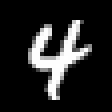

In [83]:
i = rand([x for x = 1:10000])
show_test_example(NN, i, test_data)

# References

[MNIST database](http://yann.lecun.com/exdb/mnist/)

Géron, Aurélien. *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems*. 2nd ed., O’Reilly Media, 2019.